In [1]:
!pip install -Iv ray==1.0.0
!pip install or-gym
!pip install numpy==1.19.5
#!pip uinstall lz4

Streaming output truncated to the last 5000 lines.
  Found link https://files.pythonhosted.org/packages/8b/62/baf1e2c2b02de7898dcacd1d1a41e323b79d25be5c88d2805c89fb424835/setuptools-0.6c11.tar.gz#sha256=630fea9b726320b73ee3ca6ff61732cb32675b0389be658080fe46383b87a1d3 (from https://pypi.org/simple/setuptools/), version: 0.6c11
  Skipping link: unsupported archive format: .exe: https://files.pythonhosted.org/packages/5a/2f/f77682b48b0b50274bd7ab826de90521c4b7e7d8479da06030d29e015205/setuptools-0.6c11.win32-py2.3.exe#sha256=873625d4fa966b049aa6a567727c6c6a4cc870dae94c7544686969d6da738e41 (from https://pypi.org/simple/setuptools/)
  Skipping link: unsupported archive format: .exe: https://files.pythonhosted.org/packages/8c/28/f3ee69ca5cd4d243f592c6045f443743904e07e8f95d7d5948198149cbaa/setuptools-0.6c11.win32-py2.4.exe#sha256=e6a0f330902e62bb6ac865bddf4abedc7fa7211ae84a77464e5db3a5161e967d (from https://pypi.org/simple/setuptools/)
  Skipping link: unsupported archive format: .exe: https:/

     |████████████████████████████████| 14.8MB 328kB/s 
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.37.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2


In [1]:
import or_gym
from or_gym.utils import create_env
import ray
from ray.rllib import agents
from ray import tune
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

'''
self.periods = 30
        self.I0 = [100, 100, 200]
        self.p = 2
        self.r = [1.5, 1.0, 0.75, 0.5]
        self.k = [0.10, 0.075, 0.05, 0.025]
        self.h = [0.15, 0.10, 0.05]
        self.c = [100, 90, 80]
        self.L = [3, 5, 10]
        self.backlog = True
        self.dist = 1
        self.dist_param = {'mu': 10}
        self.alpha = 0.97
        self.seed_int = 0
        self.user_D = np.zeros(self.periods)
        self._max_rewards = 2000
'''

# Environment and RL Configuration Settings
env_name = 'InvManagement-v1'
env_config = {'I0': [50, 50, 50, 50],
              'p': 3,
              'dist': 1,
              'dist_param': {'mu': 20},
              'alpha':0.97,
              'seed_int': 0,
              'max_rewards': 5000,
              'r': [1.5, 1.0, 0.75, 0.5, 0.5],
              'k': [0.10, 0.075, 0.05, 0.025, 0.025],
              'h': [0.15, 0.10, 0.05, 0.05],
              'c':[100, 100, 100, 100],
              'L': [2, 3, 3, 5],
              'periods': 30} # Change environment parameters here

env = or_gym.make('InvManagement-v1', env_config=env_config)


def register_env(env_name, env_config=env_config):
    env = create_env(env_name)
    tune.register_env(env_name,
        lambda env_name: env(env_name,
            env_config=env_config))

rl_config = dict(
    env=env_name,
    num_workers=2,
    env_config=env_config,
    model=dict(
        vf_share_layers=False,
        fcnet_activation='elu',
        fcnet_hiddens=[256, 256]
    ),
    lr=1e-5,
    train_batch_size=2000

)
# Register environment
register_env(env_name, env_config)

# Initialize Ray and Build Agent
ray.init(ignore_reinit_error=True)
agent = agents.ppo.PPOTrainer(env=env_name, config=rl_config)
results = []
for i in range(500):
    res = agent.train()
    results.append(res)
    '''
    try:
      res = agent.train()
      results.append(res)
    except ValueError:
      results.append(results[-1])'''

    '''
    if (i+1) % 5 == 0:
        print('\rIter: {}\tReward: {:.2f}'.format(
                i+1, res['episode_reward_mean']), end='')'''
    print('\rIter: {}\tReward: {:.2f}'.format(i + 1, res['episode_reward_mean']), end='')




Instructions for updating:
non-resource variables are not supported in the long term


lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`.
2021-04-20 09:03:08,906	INFO services.py:1166 -- View the Ray dashboard at http://127.0.0.1:8265
2021-04-20 09:03:09,236	INFO logger.py:201 -- pip install 'ray[tune]' to see TensorBoard files.
2021-04-20 09:03:09,252	WARNING logger.py:343 -- Could not instantiate TBXLogger: No module named 'tensorboardX'.
2021-04-20 09:03:09,258	INFO trainer.py:591 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-04-20 09:03:09,262	INFO trainer.py:618 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=928) WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=928) Instructions for u

Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.
Iter: 1	Reward: -80.83

(pid=928) WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/ray/rllib/policy/tf_policy.py:874: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
(pid=928) Instructions for updating:
(pid=928) Prefer Variable.assign which has equivalent behavior in 2.X.
(pid=927) WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/ray/rllib/policy/tf_policy.py:874: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
(pid=927) Instructions for updating:
(pid=927) Prefer Variable.assign which has equivalent behavior in 2.X.


Iter: 500	Reward: 377.69

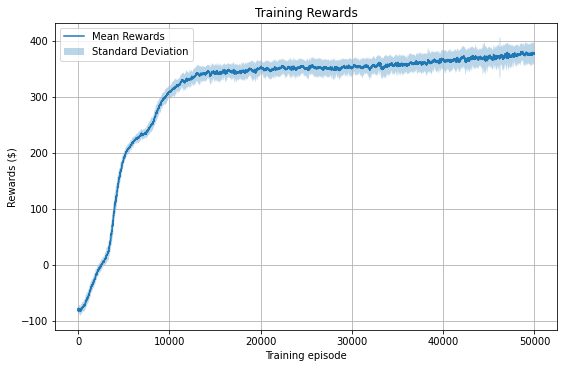

In [2]:
rewards = np.hstack([i['hist_stats']['episode_reward']
    for i in results])

p = 100
mean_rewards = np.array([np.mean(rewards[i-p:i+1])
                if i >= p else np.mean(rewards[:i+1])
                for i, _ in enumerate(rewards)])
std_rewards = np.array([np.std(rewards[i-p:i+1])
               if i >= p else np.std(rewards[:i+1])
               for i, _ in enumerate(rewards)])
fig = plt.figure(constrained_layout=True, figsize=(15, 5))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
ax0.fill_between(np.arange(len(mean_rewards)),
                 mean_rewards - std_rewards,
                 mean_rewards + std_rewards,
                 label='Standard Deviation', alpha=0.3)
ax0.plot(mean_rewards, label='Mean Rewards')
ax0.set_ylabel('Rewards ($)')
ax0.set_xlabel('Training episode')
ax0.set_title('Training Rewards')
ax0.legend()
plt.grid()
plt.show()

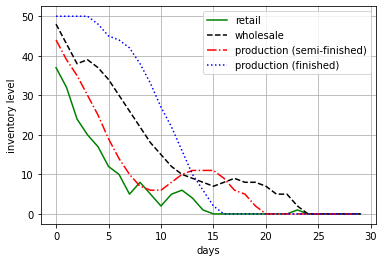

In [21]:
episode_reward = 0
done = False
obs = env.reset()
observations = []
while not done:
  action = agent.compute_action(obs)
  obs, reward, done, info = env.step(action)
  episode_reward += reward
  observations.append(obs)
ray.shutdown()

inv1 = []
inv2 = []
inv3 = []
inv4 = []
days = []
for i in range(len(observations)):
  inv1.append(observations[i][0])
  inv2.append(observations[i][1])
  inv3.append(observations[i][2])
  inv4.append(observations[i][3])
  days.append(i)
#fig = plt.figure(constrained_layout=True, figsize=(30, 10))
plt.plot(days, inv1, color='green', label='retail')
plt.plot(days, inv2, '--', color='black', label='wholesale')
plt.plot(days, inv3, '-.', color='red', label='production (semi-finished)')
plt.plot(days, inv4, ':', color='blue', label='production (finished)')
plt.grid()
plt.legend()
plt.xlabel('days')
plt.ylabel('inventory level')
plt.show()